# Social Media Analytics
## Group Assignment #1
---

# PART 3

In [1]:
from nltk import word_tokenize

def get_targets(post, brand_dict):
    
    ''' Take individual post and return only the words that appear in the brand dictionary (brands and models) '''
    
    # Tokenize post
    tokens = word_tokenize(post)
    
    # Remove all tokens but brands and models
    targets = [word.lower() for word in tokens if word.lower() in brand_dict.keys() or word.lower() in brand_dict.values()]
    
    return targets



def models_to_brands(targets, brand_dict):
    
    ''' Take list of brands and models and return new list where the models are converted to their respective brands '''
    
    # Create list to store brand names
    brands = []
    
    # Iterate through words
    for word in targets:
        
        # Convert models to brands and add to brand list
        if word in brand_dict.keys():
            brands.append(brand_dict[word])
            
        # Add brands that were mentioned to list
        elif word in brand_dict.values():
            brands.append(word)
        
        else:
            continue
        
    return brands



def get_unique_brands(brand_list):
    
    ''' Take list of brands and return new list that removes duplicates '''
    
    # Create list to store unique brand names
    unique_brands = []
    
    for brand in brand_list:
        if brand not in unique_brands:
            unique_brands.append(brand)
    
    return unique_brands

In [2]:
import pandas as pd

edmunds = pd.read_csv('Edmunds_Posts.csv')
posts = edmunds['Post'].dropna().tolist()
test = posts[0:100]

In [5]:
cars = pd.read_csv('cars.csv')

makes = cars['make']
models = cars['model']

# Convert make and model strings to unicode
keys = []
values = []
for model in models:
    keys.append(unicode(model, "ISO-8859-1"))

for make in makes:
    values.append(unicode(make, "ISO-8859-1"))
    

# Create dictionary mapping models to their respective brands
brand_dict = dict(zip(keys, values))

In [6]:
brand_dict

{u'128i': u'bmw',
 u'3-series': u'bmw',
 u'300M': u'chrysler',
 u'328i': u'bmw',
 u'330c': u'bmw',
 u'330ci': u'bmw',
 u'335d': u'bmw',
 u'335i': u'bmw',
 u'370z': u'nissan',
 u'3er': u'bmw',
 u'4-series': u'bmw',
 u'4Runner': u'toyota',
 u'5-series': u'bmw',
 u'528i': u'bmw',
 u'535i': u'bmw',
 u'5DR': u'honda',
 u'5er': u'bmw',
 u'6-series': u'bmw',
 u'640i': u'bmw',
 u'6i': u'mazda',
 u'6mt': u'infiniti',
 u'APV': u'suzuki',
 u'AZ-Offroad': u'mazda',
 u'AZ-Wagon': u'mazda',
 u'Accent': u'hyundai',
 u'Acty': u'honda',
 u'Aerio': u'suzuki',
 u'Agile': u'chevrolet',
 u'Allion': u'toyota',
 u'Alphard': u'toyota',
 u'Amaze': u'honda',
 u'Aria': u'honda',
 u'Atenza': u'mazda',
 u'Atos': u'hyundai',
 u'Atoz': u'hyundai',
 u'Aurion': u'toyota',
 u'Auris': u'toyota',
 u'Avalon': u'toyota',
 u'Avante': u'hyundai',
 u'Avanza': u'toyota',
 u'Avensis': u'toyota',
 u'Aveo': u'chevrolet',
 u'Axela': u'mazda',
 u'Axio': u'toyota',
 u'Aygo': u'toyota',
 u'BRZ': u'subaru',
 u'BT-50': u'mazda',
 u'Bel

## Part 3 - Task A

Identify the top 10 brands by frequency.

In [7]:
import math

def count_brand_frequencies(posts, brand_dict):
    
    ''' Take list of posts and return a dictionary of frequency counts for each brand that was mentioned '''
    
    # Initialize frequency dictionary
    brand_counts = {}
    
    # Iterate through posts
    for post in posts:
        
        post = post.decode("utf8")
        
        # Retrieve brand names and models from post
        targets = get_targets(post, brand_dict)
        
        # Create list of brands that were mentioned in post (models converted to respective brands)
        brands = models_to_brands(targets, brand_dict)
        
        # Retrieve only unique brand names from list of brands that were mentioned
        unique_brands = get_unique_brands(brands)
        
        # Add each brand that was mentioned to total brand count
        for brand in unique_brands:
            if brand not in brand_counts.keys():
                brand_counts[brand] = 1
            else:
                brand_counts[brand] += 1
    
    return brand_counts

In [8]:
# Run on sample
count_brand_frequencies(test, brand_dict)

{u'acura': 13,
 u'audi': 29,
 u'bmw': 26,
 u'buick': 1,
 u'cadillac': 4,
 u'chevrolet': 2,
 u'chrysler': 2,
 u'ford': 11,
 u'honda': 8,
 u'hyundai': 1,
 u'infiniti': 10,
 u'lexus': 11,
 u'lincoln': 4,
 u'mazda': 2,
 u'mercedes-benz': 15,
 u'mitsubishi': 2,
 u'nissan': 7,
 u'pontiac': 1,
 u'subaru': 2,
 u'suzuki': 2,
 u'toyota': 6,
 u'volkswagen': 10,
 u'volvo': 8}

In [9]:
# Run on entire set of posts
brand_frequencies = count_brand_frequencies(posts, brand_dict)
brand_frequencies

{u'acura': 665,
 u'audi': 776,
 u'bmw': 2669,
 u'buick': 82,
 u'cadillac': 265,
 u'chevrolet': 166,
 u'chrysler': 88,
 u'dodge': 102,
 u'ford': 218,
 u'honda': 515,
 u'hyundai': 117,
 u'infiniti': 597,
 u'kia': 34,
 u'lexus': 981,
 u'lincoln': 215,
 u'mazda': 135,
 u'mercedes-benz': 394,
 u'mercury': 11,
 u'mitsubishi': 41,
 u'nissan': 387,
 u'pontiac': 91,
 u'saturn': 24,
 u'subaru': 190,
 u'suzuki': 13,
 u'toyota': 402,
 u'volkswagen': 299,
 u'volvo': 290}

In [10]:
df_brand_frequencies = pd.DataFrame(brand_frequencies.items(), columns=['brand','frequency'])
df_brand_frequencies = df_brand_frequencies.sort_values(by='frequency', ascending=False).reset_index().drop('index', axis=1)
df_brand_frequencies

,brand,frequency
0,bmw,2669
1,lexus,981
2,audi,776
3,acura,665
4,infiniti,597
5,honda,515
6,toyota,402
7,mercedes-benz,394
8,nissan,387
9,volkswagen,299


In [11]:
import seaborn

Populating the interactive namespace from numpy and matplotlib


/Users/lindsaytober/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<Container object of 27 artists>

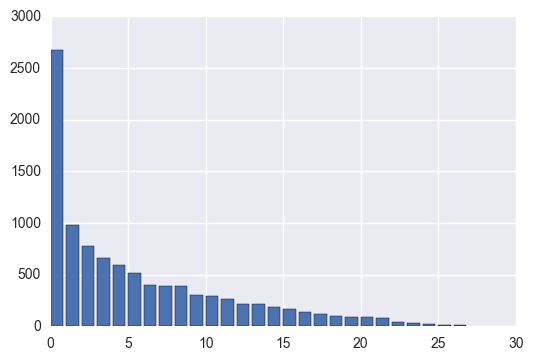

In [12]:
%pylab inline
bar(df_brand_frequencies.index, df_brand_frequencies['frequency'])

The top 10 brands by frequency are:
Axes(0.125,0.125;0.775x0.775)


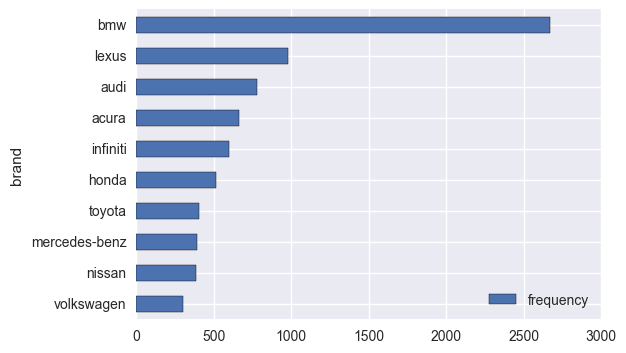

In [13]:
print 'The top 10 brands by frequency are:'
print df_brand_frequencies[:10].sort_values(by='frequency', ascending=True).plot(x='brand',kind = 'barh')

In [14]:
# Select the list of top 10 brands
list_top_brands=df_brand_frequencies['brand'].values[:10]

From the posts, calculate lift ratios for associations between the brands.

In [15]:
def get_brand_pairs(list_top_brands):
    ''' Takes list of top brands and generates list of brands and brand pairs '''
    
    # Initialize list of brand pairs with list of brands
    brand_dict=dict(zip(range(len(list_top_brands)),sorted(list_top_brands)))
    brand_pairs=sorted(list_top_brands)
    
    # Add brand pairs to the list
    for i, brand in enumerate(brand_pairs):
        if i<len(brand_pairs):
            n=i
            while n+1 in brand_dict.keys():
                brand_pairs.append(''.join([brand_dict[i],"_",brand_dict[n+1]]))
                n+=1
    
    return brand_pairs


def get_brand_and_pair_counts(list_top_brands, posts):
    ''' Takes list of top brands and brand pairs and returns counts and co-occurence counts'''
    
    # Create dictionary with starting 0 counts for each brand / brand pair
    top_brand_pairs=get_brand_pairs(list_top_brands)
    dict_brand_pair_counts=dict(zip(top_brand_pairs,[0]*len(top_brand_pairs)))
    
    # Process each post
    for post in posts:
        post = post.decode("utf8")

        # Retrieve brand names and models from post
        targets = get_targets(post, brand_dict)

        # Create list of brands that were mentioned in post (models converted to respective brands)
        brands = models_to_brands(targets, brand_dict)

        # Retrieve only unique brand names from list of brands that were mentioned
        unique_brands = sorted(get_unique_brands(brands))

        # Update dictionary with brand and brand pair counts
        for i,brand in enumerate(unique_brands):
            if brand in dict_brand_pair_counts.keys():
                dict_brand_pair_counts[brand]+=1
                if i<len(unique_brands):
                    n=i
                    while n+1<len(unique_brands):
                        n+=1
                        if unique_brands[n] in dict_brand_pair_counts.keys():
                            dict_brand_pair_counts[''.join([unique_brands[i],"_",unique_brands[n]])]+=1
        
    return dict_brand_pair_counts

In [16]:
def get_brand_lift_calculations(list_top_brands, posts):
    ''' Given list of brands, calculate lift ratios for associations between the brands in a set of posts '''
    
    # Get dictionary of counts for each brand and co-occurence
    counts = get_brand_and_pair_counts(list_top_brands,posts)
    tot_posts=len(posts)
    
    # Calculate lift    
    top_brands = sorted(list_top_brands)
    lift_dict={}
    for i, brand in enumerate(top_brands):
        brand_lifts=[]
        for n in range(len(top_brands)):
            if n<i:
                brand_lifts.append('')
            elif n==i:
                brand_lifts.append('---')
            elif n>i:
                compare_brand=top_brands[n]
                lift_calc=(tot_posts*counts[brand+'_'+compare_brand]*1.)/(counts[brand]*counts[compare_brand])
                brand_lifts.append(lift_calc)
        lift_dict[brand]=brand_lifts
    
    return lift_dict

def print_brand_lift_calculations(list_top_brands, posts):
    ''' PRINTED VERSION -- Given list of brands, calculate lift ratios for associations between the brands in a set of posts '''
    
    # Get dictionary of counts for each brand and co-occurence
    counts = get_brand_and_pair_counts(list_top_brands,posts)
    tot_posts=len(posts)
    
    # Tokenize post    
    top_brands = sorted(list_top_brands)
    for i, brand in enumerate(top_brands):
        if i<len(top_brands):
            n=i
            while n+1<len(top_brands):
                n+=1
                print '\n----------',top_brands[i],'and',top_brands[n],'----------'
                print top_brands[i]+':', counts[brand]
                print top_brands[n]+':', counts[top_brands[n]]
                print 'both:', counts[top_brands[i]+'_'+top_brands[n]]
                lift=(tot_posts*counts[top_brands[i]+'_'+top_brands[n]]*1.)/(counts[brand]*counts[top_brands[n]])
                print 'lift:',lift

In [17]:
# Calculate lift ratios
lift_calculations=get_brand_lift_calculations(list_top_brands, posts)

In [18]:
# Show lift calculations in a dataframe
df_lift_calculations=pd.DataFrame(lift_calculations,index=sorted(list_top_brands))
df_lift_calculations

,acura,audi,bmw,honda,infiniti,lexus,mercedes-benz,nissan,toyota,volkswagen
acura,---,,,,,,,,,
audi,2.33459,---,,,,,,,,
bmw,1.58883,1.61577,---,,,,,,,
honda,2.91843,1.6301,1.22706,---,,,,,,
infiniti,4.33831,2.36935,1.8146,1.33517,---,,,,,
lexus,3.17363,2.0632,1.83368,1.6074,3.26084,---,,,,
mercedes-benz,2.69072,3.70685,1.89243,2.11104,2.20048,2.90914,---,,,
nissan,2.28861,1.36693,1.08861,4.61189,2.78104,1.43387,1.75579,---,,
toyota,2.0363,1.28731,1.33078,6.50883,1.26426,2.78336,2.25371,4.76103,---,
volkswagen,2.01966,4.07692,1.37545,3.01359,1.99974,1.33867,3.48458,3.162,2.22732,---


In [19]:
# Show printed lift calculations by brand pairs
print_brand_lift_calculations(list_top_brands,posts)


---------- acura and audi ----------
acura: 665
audi: 776
both: 135
lift: 2.33458646617

---------- acura and bmw ----------
acura: 665
bmw: 2669
both: 316
lift: 1.58882631832

---------- acura and honda ----------
acura: 665
honda: 515
both: 112
lift: 2.91842616249

---------- acura and infiniti ----------
acura: 665
infiniti: 597
both: 193
lift: 4.33831311948

---------- acura and lexus ----------
acura: 665
lexus: 981
both: 232
lift: 3.17363439179

---------- acura and mercedes-benz ----------
acura: 665
mercedes-benz: 394
both: 79
lift: 2.69072172818

---------- acura and nissan ----------
acura: 665
nissan: 387
both: 66
lift: 2.28860523402

---------- acura and toyota ----------
acura: 665
toyota: 402
both: 61
lift: 2.03629970449

---------- acura and volkswagen ----------
acura: 665
volkswagen: 299
both: 45
lift: 2.01966454598

---------- audi and bmw ----------
audi: 776
bmw: 2669
both: 375
lift: 1.61577369801

---------- audi and honda ----------
audi: 776
honda: 515
both: 73


Show the brands on a multi-dimensional scaling map.

## Part 3 - Task B

What insights can you offer brand managers from your analysis in Task A?

## Part 3 - Task C

### Start of Part C
- Does reference code from above
- Some new functions created that are slightly different from above

In [20]:
from nltk.corpus import stopwords
import string

def get_attribute_targets(post, brand_dict):
    
    ''' Take individual post and return only the words that are not brand/model and not stopwords '''
    
    punctuations = list(string.punctuation)
    
    # Tokenize post    
    tokens = word_tokenize(post)
    
    # Remove stop words and punctuation
    targets = [word.lower() for word in tokens if word.lower() not in stopwords.words('english') and word.lower() not in ["cars","car", "like","one","would"]]
    #targets_punct = [word.lower() for word in targets if word.lower() not in punctuations] 
    targets_punct = [word.lower() for word in targets if word.lower().isalpha()] 
    
    # Remove brands and models
    targets_final = [word.lower() for word in targets_punct if word.lower() not in brand_dict.keys() and word.lower() not in brand_dict.values()]
    
    return targets_final

In [21]:
def words_to_attributes(targets, attribute_dict):
    ''' Take list of tokenized words and return a list with targets replaced with attributes'''
    
    # Create a list of tokens converted to attributes
    tokens = []
    
    # Iterate through words
    for word in targets:
        
        # Convert words to attributes and add to tokens list
        if word in attribute_dict.keys():
            tokens.append(attribute_dict[word])
        
        # Add all other words un-converted
        else:
            tokens.append(word)
    
    return tokens

In [22]:
def count_attribute_frequencies(posts, brand_dict, attribute_dict):
    ''' Take list of posts and return a dictionary of frequency counts for each non-brand that was mentioned '''
    
    # Initialize frequency dictionary
    word_counts = {}
    
    # Iterate through posts
    for post in posts:
        
        post = post.decode("utf8")
        
        # Retrieve attribute tokens from post
        targets = get_attribute_targets(post, brand_dict)
        
        # Create list of attributes (converted rom list), continue if none provided
        if len(attribute_dict.keys())>0:
            attributes = words_to_attributes(targets, attribute_dict)
        else:
            attributes = targets
        
        # Retrieve only unique tokens from list that were mentioned
        unique_tokens = get_unique_brands(attributes)
        
        # Add each token that was mentioned to total token count
        for token in unique_tokens:
            if token not in word_counts.keys():
                word_counts[token] = 1
            else:
                word_counts[token] += 1
                
    return word_counts

### Excluded code which first calculated the frequencies of all words
- Manually "mapped" some words to categories and created AttributesMap
- Unecessary extra computing, so excluded
<br>NE

In [23]:
attributes = pd.read_csv('AttributesMap.csv')

words = attributes['word']
categories = attributes['category']

# Convert words and category strings to unicode
keys = []
values = []
for word in words:
    keys.append(unicode(word, "ISO-8859-1"))

for cat in categories:
    values.append(unicode(cat, "ISO-8859-1"))

# Create dictionary mapping words to their respective categories
attribute_dict = dict(zip(keys, values))

In [24]:
# Map words to categories and count frequencies
attribute_frequencies_convert = count_attribute_frequencies(posts, brand_dict, attribute_dict)
attribute_frequencies_convert

{u'convolute': 1,
 u'unscientific': 1,
 u'finessed': 1,
 u'awdrl': 1,
 u'seatsare': 1,
 u'yellow': 9,
 u'four': 99,
 u'rocketing': 1,
 u'woods': 11,
 u'verses': 1,
 u'hanging': 8,
 u'onlder': 1,
 u'genre': 5,
 u'transferrable': 1,
 u'marching': 1,
 u'increase': 74,
 u'headand': 1,
 u'eligible': 2,
 u'snowing': 4,
 u'hordes': 1,
 u'objection': 1,
 u'wizardry': 2,
 u'exclusivly': 1,
 u'fingernails': 1,
 u'outwit': 1,
 u'turbodiesel': 7,
 u'underdogs': 1,
 u'screamers': 1,
 u'lord': 6,
 u'immature': 1,
 u'sprintsyet': 1,
 u'founding': 1,
 u'sinking': 3,
 u'inclement': 3,
 u'digit': 2,
 u'navigating': 1,
 u'regional': 2,
 u'deadining': 1,
 u'fwr': 1,
 u'hdtv': 2,
 u'replaces': 4,
 u'tantalizing': 1,
 u'foul': 4,
 u'classifications': 1,
 u'screaming': 12,
 u'markers': 3,
 u'advices': 1,
 u'wooded': 1,
 u'basics': 1,
 u'internally': 2,
 u'prize': 6,
 u'vibrational': 1,
 u'wooden': 1,
 u'synergy': 1,
 u'distate': 3,
 u'niceities': 1,
 u'wednesday': 5,
 u'piling': 1,
 u'oooo': 1,
 u'woudnt': 1

In [25]:
# Create dataframe
df_attribute_frequencies_convert = pd.DataFrame(attribute_frequencies_convert.items(), columns=['attribute','frequency'])

# Sort by frequency
df_attribute_frequencies_convert = df_attribute_frequencies_convert.sort_values(by='frequency', ascending=False).reset_index().drop('index', axis=1)

# Select top 5 most frequent
attribute_top_5 = df_attribute_frequencies_convert.ix[:4]['attribute']
attribute_top_5

0    performance
1         luxury
2         design
3          value
4        options
Name: attribute, dtype: object

In [28]:
df_attribute_frequencies_convert[:5]

,attribute,frequency
0,performance,4047
1,luxury,2481
2,design,2454
3,value,2175
4,options,1850


The top 5 attributes by frequency are:
Axes(0.125,0.125;0.775x0.775)


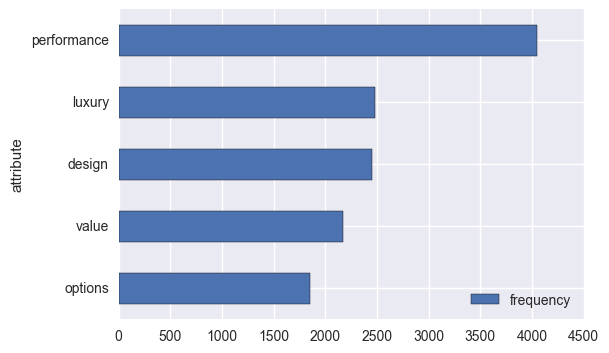

In [29]:
print 'The top 5 attributes by frequency are:'
print df_attribute_frequencies_convert[:5].sort_values(by='frequency', ascending=True).plot(x='attribute',kind = 'barh')

### Top 5 have been exported to a text file "attribute5.txt"
- format is word1,word2,word3,word4,word5,

Calculate lift ratios for top 5 brands with top 5 attributes.

In [30]:
# Get top 5 brands and counts
top_5_brands=list_top_brands[:5]
dict_top_5_brands_freq=dict(zip(list(df_brand_frequencies['brand'][:5]),list(df_brand_frequencies['frequency'][:5])))

# Get top 5 attributes counts
dict_top_5_attributes_freq=dict(zip(list(df_attribute_frequencies_convert['attribute'][:5]),list(df_attribute_frequencies_convert['frequency'][:5])))


In [31]:
def tokenize_post_for_brand_and_attributes(post,top_5_list):  
    ''' Tokenizes posts and returns unique instances of top 5 brands / attributes '''

    # Tokenize post
    post = post.decode("utf8")
    tokens = word_tokenize(post)

    # Remove stop words and punctuation
    targets = [word.lower() for word in tokens if word.lower() not in stopwords.words('english') and word.lower() not in ["cars","car", "like","one","would"]]
    targets_punct = [word.lower() for word in targets if word.lower().isalpha()] 
    
    # Convert attributes to common words
    word_list=[]
    for word in targets_punct:
        if word in attribute_dict.keys():
            word_list.append(attribute_dict[word])
        elif word in brand_dict.keys():
            word_list.append(brand_dict[word])
        else:
            word_list.append(word)

    # Return unique list of brands and models
    targets_final = [word.lower() for word in word_list if word.lower() in top_5_list]
    unique_brands_and_attributes=list(set(targets_final))
    
    return unique_brands_and_attributes 

def get_brand_and_attribute_counts(brands_list, attributes_list, posts):
    ''' Given lists of brands and attributes, calculate co-occurences in a set of posts '''
    
    # Set up dictionary of counts for each brand/attribute pair combination
    brands=brands_list
    attributes=attributes_list
    top_5_list=brands+attributes
    brand_attributes_pairs={}
    for brand in brands:
        brand_attributes_pairs[brand]=dict(zip(attributes,[0]*5))

    # Get counts by brand for co-occurence with each attribute
    for post in posts:
        post_tokens=tokenize_post_for_brand_and_attributes(post,top_5_list)
        for brand in brands:
            if brand in post_tokens:
                for attribute in attributes:
                    if attribute in post_tokens:
                        brand_attributes_pairs[brand][attribute]+=1
    
    return brand_attributes_pairs



In [32]:
def get_attribute_lift_calculations(top_5_brands_freqdict, top_5_attributes_freqdict, posts):
    ''' Given lists/freqencies of brands and attributes, calculate lift ratios for associations between the brands and attributes in a set of posts '''
    
    # Get dictionary of counts for each brand/attribute pair combination
    brands=top_5_brands_freqdict.keys()
    attributes=top_5_attributes_freqdict.keys()
    counts = get_brand_and_attribute_counts(brands, attributes, posts)
    tot_posts=len(posts)
    
    # Calculate lift    
    lift_dict={}
    
    for attribute in attributes:
        attributebrand_lifts=[]
        for brand in brands:
            lift_calc=(tot_posts*counts[brand][attribute]*1.)/(top_5_brands_freqdict[brand]*top_5_attributes_freqdict[attribute])
            attributebrand_lifts.append(lift_calc)
        lift_dict[attribute]=attributebrand_lifts
    
    return lift_dict

In [33]:
# Get lift ratios for brands and attributes
brandattribute_lift_calculations=get_attribute_lift_calculations(dict_top_5_brands_freq,dict_top_5_attributes_freq,posts)

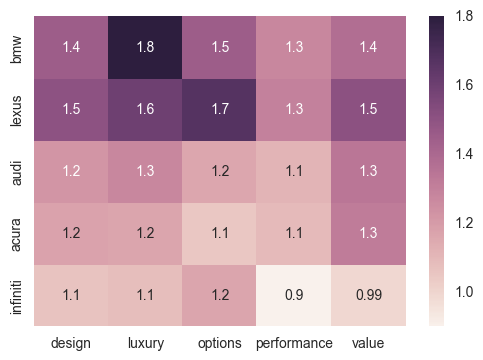

In [34]:
import seaborn as sns

# Show lift ratios for brands and attributes in a table
df_brandattribute_lift_calculations=pd.DataFrame(brandattribute_lift_calculations,index=top_5_brands)

sns.heatmap(df_brandattribute_lift_calculations,annot = True)

## Part 3 - Task D

What advice will you give to a (i) product manager, and (ii) marketing/advertising manager of these brands based on your analysis in Task C?

## Part 3 - Task E

Functions to replace aspirational terms with 'aspirational' and get counts.

In [35]:
import nltk

In [36]:
# Set aspirational words / phrases
aspirational_words=['wish','dream','hope']
aspirational_phrases=['would like','one day','hope to','test drive','saving up']

In [50]:
def tokenize_post_for_aspiration(post):  
    ''' Tokenizes posts and returns unique instances of top 5 brands / presence of aspirational words/phrases '''

    # Tokenize post
    post = post.decode("utf8")
    tokens = word_tokenize(post)

    # Remove punctuation
    tokens_punct = [word.lower() for word in tokens if word.lower().isalpha()] 
    
    # Select important words
    word_list=[]

    # Get brands and aspirational words in post
    for word in tokens_punct:
        if word in brand_dict.keys():
            word_list.append(brand_dict[word])
        elif word in brand_dict.values():
            word_list.append(word)
        elif word in aspirational_words:
            word_list.append('aspirational')

    # Get aspirational phrases in post
    for (word1, word2) in nltk.bigrams(tokens_punct):
        phrase=' '.join([word1,word2])
        if phrase in aspirational_phrases:
            word_list.append('aspirational')


    # Return unique list of brands and models
    targets_final = [word.lower() for word in word_list]
    uniquebrands_and_aspirations=list(set(targets_final))
    
    return uniquebrands_and_aspirations

In [51]:
def get_brand_and_aspiration_counts(brands,posts):
    ''' Get word counts for brands and references to aspirational words/phrases '''

    brand_aspiration_dict=dict(zip(brands,[0]*len(brands)))
    brand_counts=dict(zip(brands,[0]*len(brands)))
    aspiration_count=0
    for post in posts:
        post_tokens=tokenize_post_for_aspiration(post)
        if 'aspirational' in post_tokens:
            aspiration_count+=1
            for key in brand_aspiration_dict.keys():
                if key in post_tokens:
                    brand_counts[key]+=1
                    brand_aspiration_dict[key]+=1
        else:
            for key in brand_aspiration_dict.keys():
                if key in post_tokens:
                    brand_counts[key]+=1
    
    return brand_aspiration_dict,brand_counts,aspiration_count

Caculate lift of brands and 'aspirational'.

In [52]:
def calculate_aspirational_lift(brands,posts):
    ''' Calculates lift ratios with aspirational words by brand '''

    tot_posts=len(posts)
    brand_aspiration_lift={}
    brand_aspiration_dict,brand_counts,aspiration_count=get_brand_and_aspiration_counts(all_brands,posts)
    for brand,cooccurrence in brand_aspiration_dict.iteritems():
        lift_calc=(tot_posts*cooccurrence*1.)/((brand_counts[brand]*aspiration_count)+.00000001) # prevents dividing by 0
        brand_aspiration_lift[brand]=lift_calc
    return brand_aspiration_lift

In [53]:
all_brands=list(set(brand_dict.values()))

In [54]:
# Apply function to calculate lift ratio for all brands
brand_aspiration_lift=calculate_aspirational_lift(all_brands,posts)

In [55]:
# Get DataFrame of lift ratios with aspirational terms
df_brand_aspiration_lift=pd.DataFrame(brand_aspiration_lift.items(),columns=['brand','lift ratio with aspirational terms'])
df_brand_aspiration_lift=df_brand_aspiration_lift.sort_values(by='lift ratio with aspirational terms', ascending=False).reset_index().drop('index', axis=1)
df_brand_aspiration_lift

,brand,lift ratio with aspirational terms
0,infiniti,2.303227
1,buick,2.065072
2,mazda,1.708894
3,volkswagen,1.699022
4,subaru,1.693359
5,acura,1.629699
6,mercury,1.539417
7,lexus,1.501755
8,saturn,1.411132
9,cadillac,1.405807


In [56]:
print 'The top 10 brands associated with aspirational comments are as follows:'
df_brand_aspiration_lift[:10]

The top 10 brands associated with aspirational comments are as follows:


,brand,lift ratio with aspirational terms
0,infiniti,2.303227
1,buick,2.065072
2,mazda,1.708894
3,volkswagen,1.699022
4,subaru,1.693359
5,acura,1.629699
6,mercury,1.539417
7,lexus,1.501755
8,saturn,1.411132
9,cadillac,1.405807


## Final Data File
(after all replacements)

In [95]:
def replacement_steps_post(post):
    ''' Performs all 'replacement' functions on a post '''
    
    post = post.decode("utf8")
    tokens=word_tokenize(post)
    tokens_punct = [word.lower() for word in tokens if word.lower().isalpha()] 
    words=[word.lower() for word in tokens_punct]
    post_words=[]
    for i,word in enumerate(words):          
        # Convert models to brands
        if word in brand_dict.keys():
            post_words.append(brand_dict[word])
        # Replace attributes with more common synonyms
        elif word in attribute_dict.keys():
            post_words.append(attribute_dict[word])
        # Replace aspirational words with 'aspirational'
        elif word in aspirational_words:
            post_words.append('aspirational')
        elif i+1<len(words):
            phrase=word+' '+words[i+1]
            if phrase in aspirational_phrases:
                post_words.append('aspirational')
            else:
                post_words.append(word)
        else:
            post_words.append(word)
            
    # Rejoin words in post
    post_combine=' '.join(post_words)
    
    return post_combine

def convert_posts(posts):
    ''' Runs each post in set of posts through 'replacement' function '''
    
    post_list=[]
    for post in posts:
        post=replacement_steps_post(post)
        post_list.append(post)
    
    return post_list

In [102]:
# Create copy of edmunds posts and drop na
edmunds_new=edmunds.copy()
edmunds_new=edmunds_new.dropna(subset=['Post']).reset_index().drop('index', axis=1)

In [103]:
edmunds_new.head(10)

,Date,Post,User
0,"April 12, 2002 2:53PM","Well I'm a Benz fan first and foremost, but th...",merc1
1,"April 14, 2002 8:09AM","I think both are excellent(sp?) cars, however ...",popovs
2,"April 17, 2002 9:23AM",It has come to my attention that as of late MB...,popovs
3,"April 17, 2002 7:37PM",There is not much to debate on this subject. ...,mvargo1
4,"April 17, 2002 8:11PM",gave up nationality based generalizations a co...,wishnhigh1
5,"April 18, 2002 11:12PM",I'm interested more towards performance than l...,cybersol
6,"April 18, 2002 11:50PM",cybersol... I can't fathom why you would want...,riez
7,"April 19, 2002 1:07AM","Sorry to disappoint with the slushbox, but if ...",cybersol
8,"April 19, 2002 2:14AM",The new Altima is great as my friends just bou...,kdshapiro
9,"April 19, 2002 2:18AM",cybersol... Excitement and slushbox don't seem...,riez


In [98]:
# Run replacement function
replaced_posts=convert_posts(edmunds_new['Post'])

In [104]:
edmunds_new['Post']=replaced_posts

In [105]:
edmunds_new.head(10)

,Date,Post,User
0,"April 12, 2002 2:53PM",well i a mercedes-benz fan first and foremost ...,merc1
1,"April 14, 2002 8:09AM",i think both are excellent sp car however neit...,popovs
2,"April 17, 2002 9:23AM",it has come to my attention that as of late mb...,popovs
3,"April 17, 2002 7:37PM",there is not much to debate on this subject if...,mvargo1
4,"April 17, 2002 8:11PM",gave up nationality based generalizations a co...,wishnhigh1
5,"April 18, 2002 11:12PM",i interested more towards performance than lux...,cybersol
6,"April 18, 2002 11:50PM",cybersol i ca fathom why you would want to go ...,riez
7,"April 19, 2002 1:07AM",sorry to disappoint with the slushbox but if w...,cybersol
8,"April 19, 2002 2:14AM",the new nissan is great as my friends just bou...,kdshapiro
9,"April 19, 2002 2:18AM",cybersol excitement and slushbox do seem to be...,riez


In [107]:
edmunds_new.to_csv('Edmunds_Posts_withReplacements.csv',encoding="utf-8")